In [17]:
from nba_api.stats.endpoints import leaguegamelog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
league_game_log = leaguegamelog.LeagueGameLog(season = '2021', player_or_team_abbreviation = 'P').get_data_frames()[0]

In [19]:
league_game_log.describe()

,PLAYER_ID,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
count,1.594700e+04,1.594700e+04,15947.000000,15947.000000,15947.000000,15117.000000,15947.000000,15947.000000,12440.000000,15947.000000,...,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000
mean,1.171706e+06,1.610613e+09,22.488054,3.727598,8.205556,0.443089,1.147551,3.294789,0.320371,1.524174,...,4.175644,2.245626,0.714429,0.452248,1.235718,1.809933,10.126920,-0.001881,20.770446,0.998620
std,6.689581e+05,8.671533e+00,10.850860,3.114588,5.910301,0.238677,1.467398,3.063392,0.288969,2.185884,...,3.461032,2.535028,0.950602,0.796266,1.407255,1.468617,8.384701,11.274101,14.395929,0.060294
min,2.207000e+03,1.610613e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-56.000000,-3.300000,0.000000
25%,2.035160e+05,1.610613e+09,15.000000,1.000000,4.000000,0.313000,0.000000,1.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.000000,9.400000,1.000000
50%,1.628401e+06,1.610613e+09,23.000000,3.000000,7.000000,0.444000,1.000000,3.000000,0.333000,1.000000,...,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,18.900000,1.000000
75%,1.629672e+06,1.610613e+09,31.000000,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,2.000000,...,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,7.000000,29.800000,1.000000
max,1.630846e+06,1.610613e+09,57.000000,19.000000,36.000000,1.000000,10.000000,20.000000,1.000000,19.000000,...,25.000000,18.000000,8.000000,8.000000,10.000000,6.000000,56.000000,52.000000,87.800000,2.000000


In [20]:
print(league_game_log.columns)
league_game_log.head()

Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PLUS_MINUS', 'FANTASY_PTS', 'VIDEO_AVAILABLE'],
      dtype='object')


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
0,22021,200765,Rajon Rondo,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,...,0,5,2,0,3,2,3,1,13.5,1
1,22021,202340,Avery Bradley,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,...,1,1,0,0,1,2,6,1,7.7,1
2,22021,1626172,Kevon Looney,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,...,4,1,1,1,1,0,7,-8,18.3,1
3,22021,2738,Andre Iguodala,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,...,1,2,0,1,0,1,12,8,19.2,1
4,22021,1627814,Damion Lee,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,...,1,2,0,0,0,3,15,9,19.2,1


In [21]:
key_centers = league_game_log.loc[(league_game_log['PLAYER_NAME'].str.contains('Embiid') | league_game_log['PLAYER_NAME'].str.contains('Giannis') | league_game_log['PLAYER_NAME'].str.contains('Jokic'))]

key_centers.tail()

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
15426,22021,203999,Nikola Jokic,1610612743,DEN,Denver Nuggets,0022100453,2022-01-26,DEN @ BKN,W,...,10,8,1,0,2,5,26,6,51.0,1
15540,22021,203954,Joel Embiid,1610612755,PHI,Philadelphia 76ers,0022100733,2022-01-27,PHI vs. LAL,W,...,9,7,1,2,4,2,26,21,52.3,1
15628,22021,203999,Nikola Jokic,1610612743,DEN,Denver Nuggets,0022100729,2022-01-28,DEN @ NOP,W,...,13,10,2,0,6,5,29,15,59.6,1
15757,22021,203507,Giannis Antetokounmpo,1610612749,MIL,Milwaukee Bucks,0022100744,2022-01-28,MIL vs. NYK,W,...,13,5,1,0,4,5,38,19,60.1,1
15832,22021,203954,Joel Embiid,1610612755,PHI,Philadelphia 76ers,0022100747,2022-01-29,PHI vs. SAC,W,...,12,6,0,1,4,0,36,5,58.4,1


In [22]:
columns = ['PLAYER_NAME', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'REB', 'BLK', 'TOV', 'PTS', 'PLUS_MINUS']
key_centers = pd.DataFrame(key_centers[columns], columns=columns)

embiid = key_centers.loc[key_centers['PLAYER_NAME'].str.contains('Embiid')]
giannis = key_centers.loc[key_centers['PLAYER_NAME'].str.contains('Giannis')]
jokic = key_centers.loc[key_centers['PLAYER_NAME'].str.contains('Jokic')]

embiid_last_10_games_mean = embiid.iloc[-10:,:].mean()
giannis_last_10_games_mean = giannis.iloc[-10:,:].mean()
jokic_last_10_games_mean = jokic.iloc[-10:,:].mean()

player_names = pd.Series(['Joel Embiid', 'Giannis Antetokounmpo', 'Nikola Jokic'])

player_means_last_10_games = pd.DataFrame([embiid_last_10_games_mean, giannis_last_10_games_mean, jokic_last_10_games_mean], columns=columns)
player_means_last_10_games['PLAYER_NAME'] = player_names

player_means_last_10_games.head()


,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,BLK,TOV,PTS,PLUS_MINUS
0,Joel Embiid,32.9,11.8,21.6,0.5445,1.3,4.0,0.3352,10.3,12.8,0.8049,11.1,1.5,3.4,35.2,6.2
1,Giannis Antetokounmpo,33.2,9.9,18.9,0.5281,1.3,4.0,0.2932,10.3,12.9,0.7815,10.5,1.2,4.6,31.4,2.4
2,Nikola Jokic,34.6,10.1,16.6,0.6186,1.9,4.3,0.4875,5.4,5.8,0.9442,12.6,0.5,3.3,27.5,10.8


In [23]:
embiid_means = embiid.mean()
giannis_means = giannis.mean()
jokic_means = jokic.mean()

player_means = pd.DataFrame([embiid_means, giannis_means, jokic_means], columns=columns)
player_means['PLAYER_NAME'] = player_names

player_means.head()

,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,BLK,TOV,PTS,PLUS_MINUS
0,Joel Embiid,32.947368,9.421053,18.894737,0.488447,1.263158,3.447368,0.361757,9.026316,11.131579,0.811763,10.763158,1.447368,2.973684,29.131579,5.394737
1,Giannis Antetokounmpo,32.707317,9.902439,18.560976,0.528610,1.097561,3.853659,0.268756,7.878049,10.926829,0.729098,11.268293,1.414634,3.585366,28.780488,6.439024
2,Nikola Jokic,33.162791,10.093023,17.674419,0.586977,1.604651,4.279070,0.416333,4.441860,5.488372,0.827537,13.813953,0.744186,3.534884,26.232558,7.209302


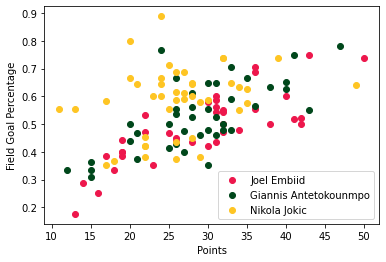

In [76]:
plt.scatter(np.array(embiid['PTS']), np.array(embiid['FG_PCT']), c='#ED174C', label ='Joel Embiid')
plt.scatter(np.array(giannis['PTS']), np.array(giannis['FG_PCT']), c='#00471B', label ='Giannis Antetokounmpo')
plt.scatter(np.array(jokic['PTS']), np.array(jokic['FG_PCT']), c='#FEC524', label ='Nikola Jokic')

plt.xlabel('Points')
plt.ylabel('Field Goal Percentage')

plt.legend()

plt.savefig('pts_analysis.png', dpi=300)